# Look at $\phi_\pi$ in default vs. rgb spring2019 GEMC (gcard) configurations

last edit May-31, 2021

## Imports and definitions

In [45]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

## Auxiliary functions

# load data 

In [46]:
main_data_path = '/Users/erezcohen/Desktop/data/BAND/AcceptanceCorrection/GEMCimulationOuputFiles/'

In [47]:
labels = ['default'  ,'rgb_spring2019'];#,'rgb_spring2019_Florian'];
colors = ['royalblue','salmon','k']

In [48]:
pips,pims = dict(),dict()
for label in labels:
    pips[label] = pd.read_csv(main_data_path + 'gcard_' + label                               
                              + '/1M_events/'                              
                              + 'eepips_p_uniform_distribution.csv');

    pims[label] = pd.read_csv(main_data_path + 'gcard_' + label
                              + '/1M_events/'                              
                              + 'eepims_p_uniform_distribution.csv');

print('Done loading data')

Done loading data


## Statistics

In [49]:
for piIdx,pi_df,pi_label,pi_print in zip([1,2],[pips,pims],pi_labels,pi_prints):
    print('-----------------------')
    print(pi_print)    
    print('-----------------------')

    for label,color in zip(labels,colors):
        print(label,'gcard')
        df = pi_df[label]
        print(len(df),pi_print,'events simulated')
        
        df = df[(df.e_reconstructed==1)]
        print(len(df),pi_print,'events electron reconstructed')

        df = df[(df.e_reconstructed==1) & (df.pi_reconstructed==1)]
        print(len(df),pi_print,'events electron and pion reconstructed')
        
        print('')

-----------------------
π+
-----------------------
default gcard
1000445 π+ events simulated
610855 π+ events electron reconstructed
396902 π+ events electron and pion reconstructed

rgb_spring2019 gcard
1000290 π+ events simulated
615010 π+ events electron reconstructed
399660 π+ events electron and pion reconstructed

-----------------------
π-
-----------------------
default gcard
1067457 π- events simulated
613196 π- events electron reconstructed
372030 π- events electron and pion reconstructed

rgb_spring2019 gcard
1000160 π- events simulated
615010 π- events electron reconstructed
910 π- events electron and pion reconstructed



In [63]:
pi_df[label].keys()#['pi_Vz']

Index(['e_P', 'e_Theta', 'e_Phi', 'e_Vz', 'pi_P', 'pi_Theta', 'pi_Phi',
       'pi_Vz', 'Npips', 'Npims', 'Nelectrons', 'Ngammas', 'Nprotons',
       'Nneutrons', 'Ndeuterons', 'e_P_g', 'e_Theta_g', 'e_Phi_g', 'e_Vz_g',
       'pi_P_g', 'pi_Theta_g', 'pi_Phi_g', 'pi_Vz_g', 'pi_reconstructed',
       'pi_passed_cuts', 'pi_passed_fiducial_cuts', 'pi_passed_PID_cuts',
       'e_reconstructed', 'e_passed_cuts', 'e_DC_sector', 'pi_DC_sector',
       'M_X', 'eepiPastKinematicalCuts', 'Unnamed: 33'],
      dtype='object')

<AxesSubplot:xlabel='$p_{\\pi}$ [GeV/c]'>

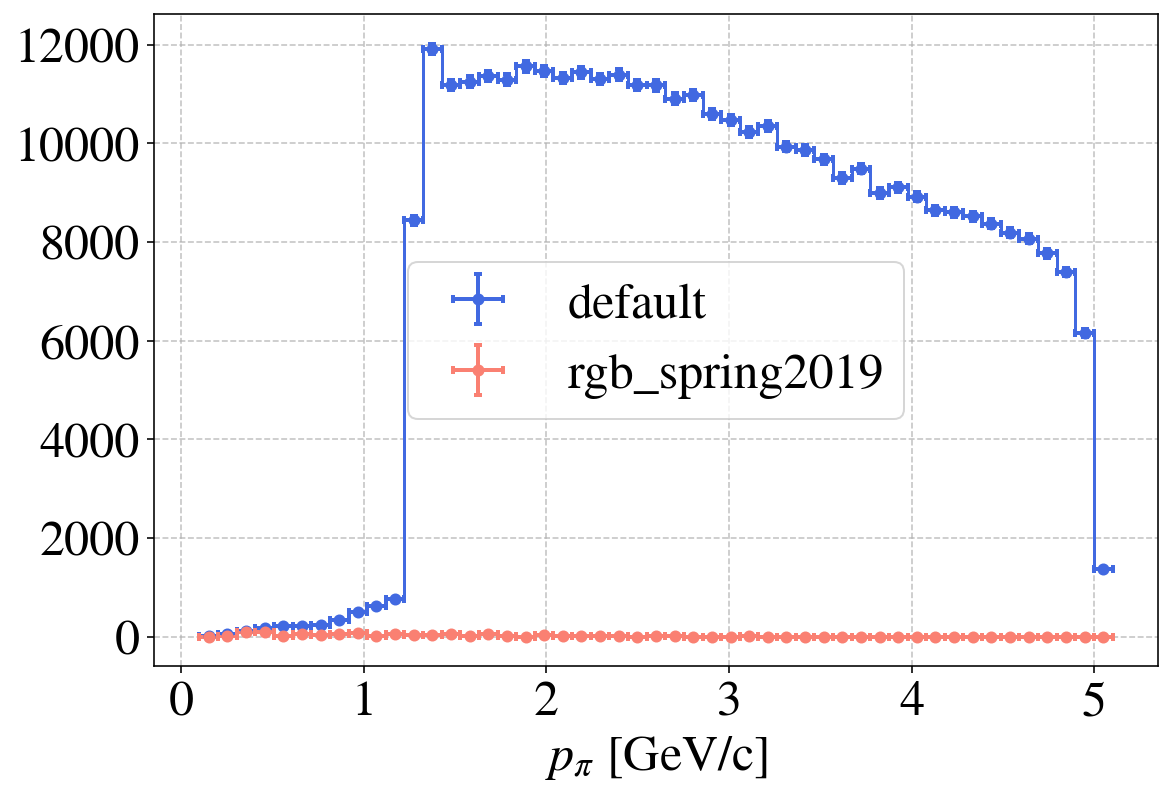

In [67]:
# var = 'pi_Vz'; xlabel = '$v_{\pi}^z$ [cm]'; vmin=-0.1 ; vmax=0.1;
var = 'pi_P'; xlabel = '$p_{\pi}$ [GeV/c]'; vmin=0.1 ; vmax=5.1;
# var = 'pi_P_g'; xlabel = '$p_{\pi}^g$ [GeV/c]'; vmin=0.1 ; vmax=5.1;
# var = 'e_P_g'; xlabel = '$p_{e}^g$ [GeV/c]'; vmin=0.1 ; vmax=5.1;
# var = 'e_Vz_g'; xlabel = '$v_{e}^z$ [cm]'; vmin=-0.1 ; vmax=0.1;


fig,ax=plt.subplots(figsize=(9,6))
for label,color in zip(labels,colors):
    df = pims[label]
    plot_step_hist(df[var], bins=np.linspace(vmin,vmax,50),label=label,color=color)
    # plot_step_hist(df[var], bins=np.linspace(vmin,vmax,50),label=label)
set_axes(ax,xlabel,do_add_grid=True,do_add_legend=True)
# pi_df[label]#['pi_Vz']

## plot $\phi_\pi$

default gcard
1000445 π+ events in total
396902 π+ events reconstructed

rgb_spring2019 gcard
1000290 π+ events in total
399660 π+ events reconstructed

default gcard
1067457 π- events in total
372030 π- events reconstructed

rgb_spring2019 gcard
1000160 π- events in total
910 π- events reconstructed



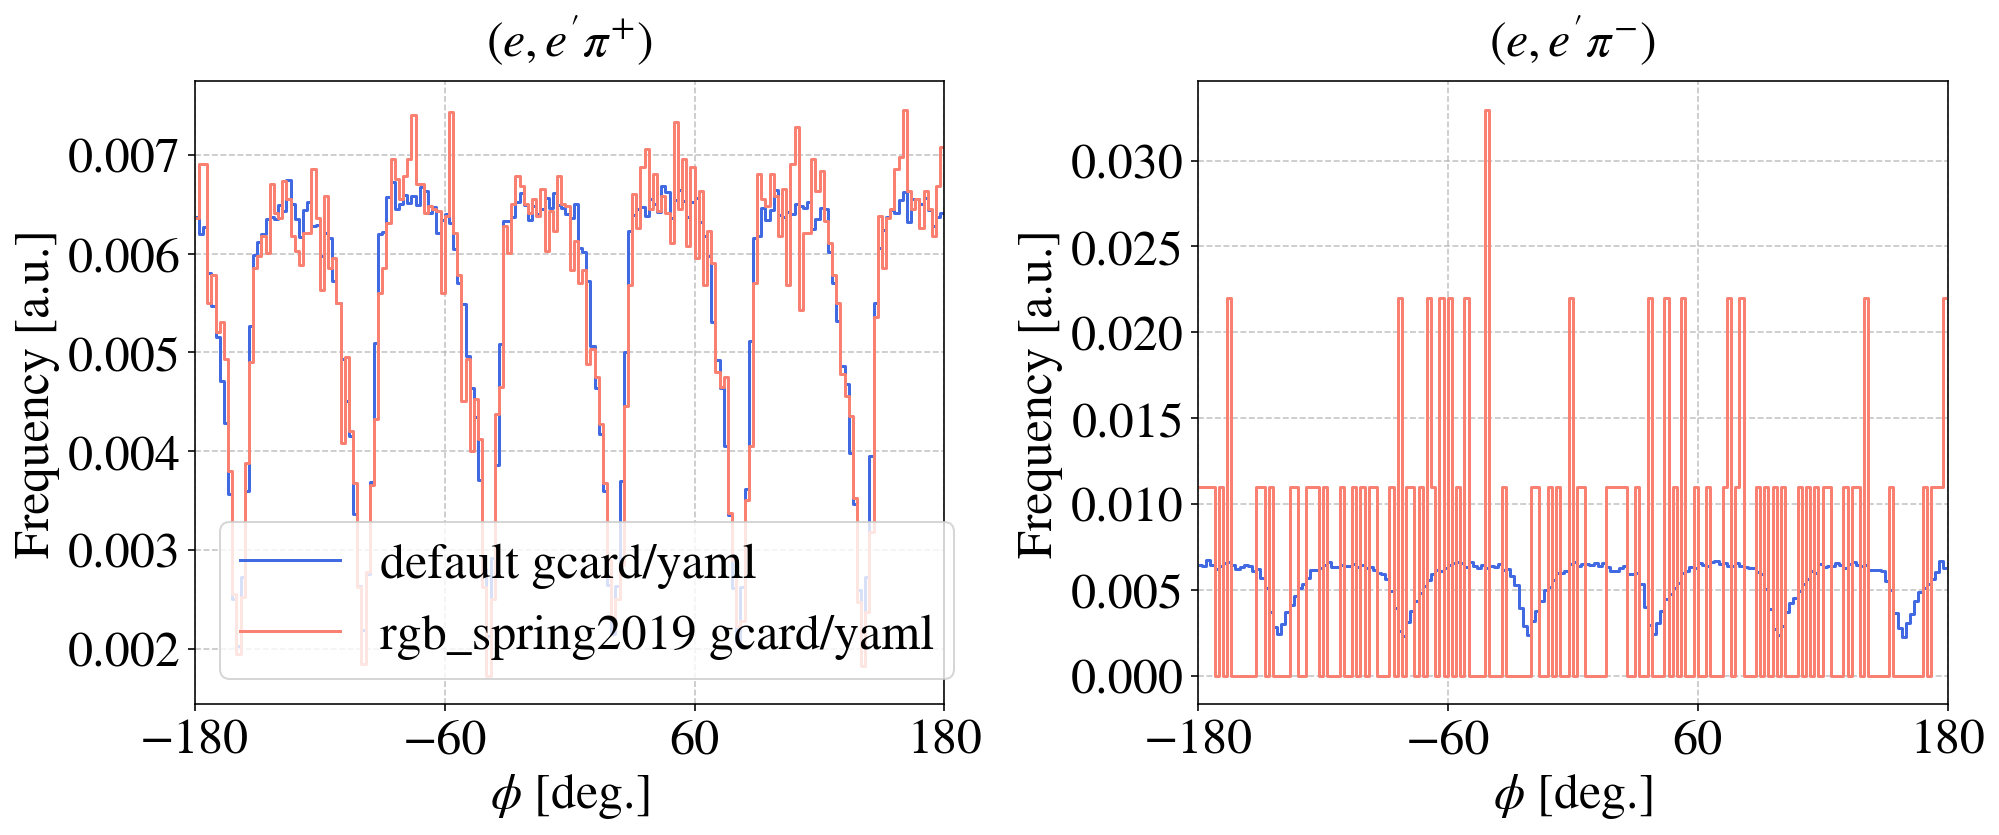

In [17]:
fig = plt.figure(figsize=(14,6));
for piIdx,pi_df,pi_label,pi_print in zip([1,2],[pips,pims],pi_labels,pi_prints):
    ax = fig.add_subplot(1,2,piIdx)

    for label,color in zip(labels,colors):
        print(label,'gcard')
        df = pi_df[label]
        # print(len(df),pi_print,'events in total')        

        df = df[(df.e_reconstructed==1) & (df.pi_reconstructed==1)]
        # print(len(df),pi_print,'events reconstructed')

        # print('')
        plot_step_hist( x_arr=df.pi_Phi*r2d,  bins=phi_bins , label=label + ' gcard/yaml', 
                       color=color, do_plot_errorbar=False, density=True, linewidth=3)

        # cosmetics
        set_axes(ax, '$\phi$ [deg.]', 'Frequency [a.u.]',
                     title= "$(e,e'" + pi_label + ")$",
                     do_add_grid=True,
                     do_add_legend=True if piIdx==1 else False,
                     xlim=phi_xlim,
                     xticks=phi_xticks)   
        
plt.tight_layout()